# Цели и задачи проекта

## Цель 
Необходимо сопоставить влияние условий жизни учащихся в возрасте от 15 до 22 лет с их успеваемостью по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Задача
Необходимо построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

# Поэтапное описание работы

## 1. Первичная обработка данных

In [65]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [66]:
# Загрузка данных
stud = pd.read_csv('stud_math.csv')
stud.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
115,GP,M,16,U,GT3,T,4.0,4.0,teacher,teacher,course,father,1.0,2.0,NaN,no,yes,no,yes,yes,-6.0,yes,NaN,no,5.0,4.0,4.0,5.0,2.0,80.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
300,GP,F,18,U,LE3,A,4.0,4.0,health,other,home,mother,1.0,2.0,0.0,no,yes,no,no,NaN,-6.0,yes,yes,yes,4.0,2.0,4.0,4.0,14.0,55.0
99,GP,F,16,U,GT3,T,4.0,3.0,other,at_home,course,mother,1.0,3.0,0.0,yes,yes,yes,NaN,yes,-9.0,yes,yes,no,5.0,3.0,5.0,3.0,0.0,40.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,-6.0,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
10,GP,F,15,U,GT3,T,4.0,4.0,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,3.0,2.0,0.0,45.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
106,GP,F,15,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,no,5.0,1.0,2.0,3.0,8.0,40.0
176,GP,F,16,U,GT3,T,2.0,2.0,services,other,reputation,mother,2.0,2.0,0.0,no,no,yes,yes,no,-6.0,yes,yes,no,3.0,4.0,4.0,5.0,2.0,55.0
316,GP,F,18,U,GT3,T,2.0,1.0,services,NaN,course,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,1.0,0.0,0.0


In [67]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

### Самые первые рассуждения и выводы:
- Общее кол-во колонок = 30, из них первоначально:
  * числовых = 13
  * текстовых = 17
  
  Возможно часть текстовых колонок понадобится переделать в числовые как, например, колонку "sex"
- Кол-во колонок без пропусков = 3. В первую очередь с ними будем сопоставлять колонки с пропусками
- Остальные колонки (27) в большей или меньшей степени имеют пропуски
- Колонка "studytime, granular":
  * для удобства использования необходимо переименовать в колонку "studytime_gran"
  * эта колонка без описания - необходимо догадаться об ее назначении. Если колонка не имеет смысла, ее стоит удалить
- В целом: возможно будут какие-то колонки к удалению
- Поскольку имеющихся пропусков относительно немного для каждой колонки с пропусками, будем пытаться заполнять их подходящими значениями

### Первые 3 колонки -  без пропусков

#### 1 school — аббревиатура школы, в которой учится ученик

,school
GP,349
MS,46


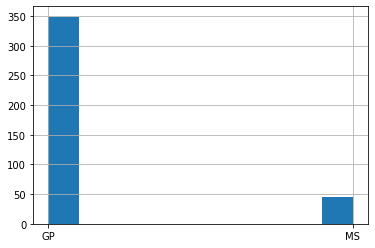

In [68]:
# Уникальные значения и их кол-во
stud.school.hist()
pd.DataFrame(stud.school.value_counts())

school  sex
GP      F      AxesSubplot(0.125,0.125;0.775x0.755)
        M      AxesSubplot(0.125,0.125;0.775x0.755)
MS      F      AxesSubplot(0.125,0.125;0.775x0.755)
        M      AxesSubplot(0.125,0.125;0.775x0.755)
Name: sex, dtype: object

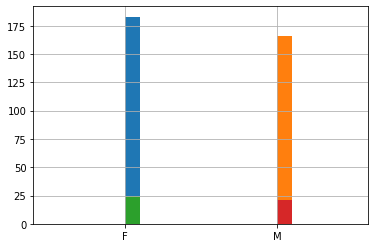

In [69]:
# Распределение вида школ и пола учащихся
stud.groupby(['school', 'sex']).sex.hist()

school  age
GP      15     AxesSubplot(0.125,0.125;0.775x0.755)
        16     AxesSubplot(0.125,0.125;0.775x0.755)
        17     AxesSubplot(0.125,0.125;0.775x0.755)
        18     AxesSubplot(0.125,0.125;0.775x0.755)
        19     AxesSubplot(0.125,0.125;0.775x0.755)
        20     AxesSubplot(0.125,0.125;0.775x0.755)
        22     AxesSubplot(0.125,0.125;0.775x0.755)
MS      17     AxesSubplot(0.125,0.125;0.775x0.755)
        18     AxesSubplot(0.125,0.125;0.775x0.755)
        19     AxesSubplot(0.125,0.125;0.775x0.755)
        20     AxesSubplot(0.125,0.125;0.775x0.755)
        21     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

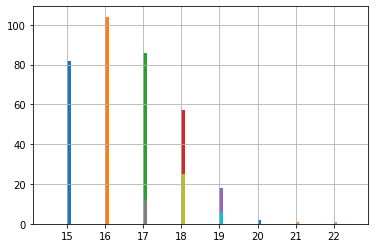

In [70]:
# Распределение вида школ и возраста учащихся
stud.groupby(['school', 'age']).age.hist()

##### Выводы по колонке school:
- Всего 2 вида школ: GP и MS
- Распределение по видам крайне неравномерное. Примерное соотношение GP/MS ~ 8/1
- Распределение вида школ и пола учащихся: примерно равномерное. В каждой школе примерно поровну юношей и девушек с небольшим перевесом в сторону девушек
- Распределение вида школ и возраста учащихся - неравномерное:
  * в школе GP представлены все возрасты с 15 до 22 за исключением возраста 21,
  * в школе MS присутствуют учащиеся только возрастов 17-21 включительно.

#### 2 sex — пол ученика ('F' - женский, 'M' - мужской)

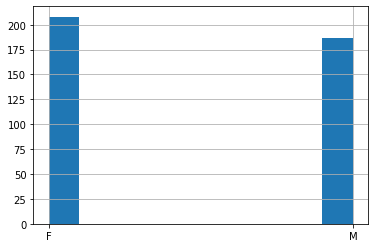

In [71]:
# Распределение между девушками юношами
stud.sex.hist();

sex  age
F    15     AxesSubplot(0.125,0.125;0.775x0.755)
     16     AxesSubplot(0.125,0.125;0.775x0.755)
     17     AxesSubplot(0.125,0.125;0.775x0.755)
     18     AxesSubplot(0.125,0.125;0.775x0.755)
     19     AxesSubplot(0.125,0.125;0.775x0.755)
     20     AxesSubplot(0.125,0.125;0.775x0.755)
M    15     AxesSubplot(0.125,0.125;0.775x0.755)
     16     AxesSubplot(0.125,0.125;0.775x0.755)
     17     AxesSubplot(0.125,0.125;0.775x0.755)
     18     AxesSubplot(0.125,0.125;0.775x0.755)
     19     AxesSubplot(0.125,0.125;0.775x0.755)
     20     AxesSubplot(0.125,0.125;0.775x0.755)
     21     AxesSubplot(0.125,0.125;0.775x0.755)
     22     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

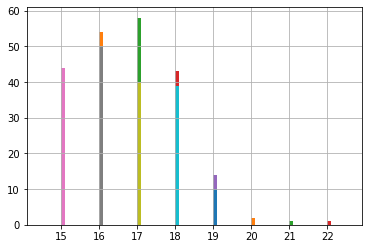

In [72]:
stud.groupby(['sex','age']).age.hist()

##### Выводы по колонке sex:
- По количеству: перевес в сторону девушек
- По возрасту: самые старшие (возраст 21 и 22 года) - только юноши

#### 3 age — возраст ученика (от 15 до 22)

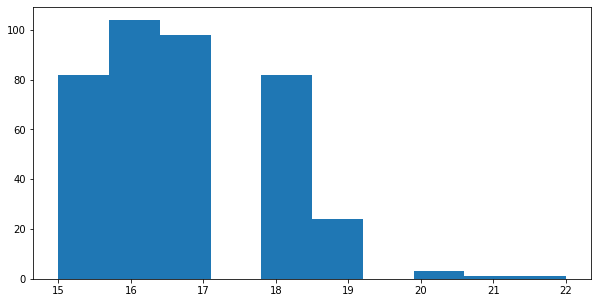

In [73]:
# Распределение по кол-ву
stud.age.hist(grid=False, xlabelsize=10, ylabelsize=10, figsize=(10,5))

In [74]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

##### Выводы по колонке age:
- Распределение по возрасту неравномерное
- Если брать во внимание только (15 лет <= возраст < 20 лет), тогда распределение примерно колоколообразное

### Остальные 27 колонок - с пропуском

#### 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

U    295
R     83
Name: address, dtype: int64

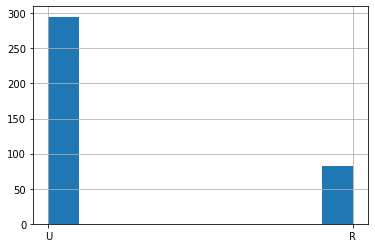

In [75]:
# 395 - 378 = 17 пропусков
# Распределение
stud.address.hist()
stud.address.value_counts()

Распределение похоже на распределение по виду школ.

Посмотрим как соотносятся виды школ и адресов

school  address
GP      R          AxesSubplot(0.125,0.125;0.775x0.755)
        U          AxesSubplot(0.125,0.125;0.775x0.755)
MS      R          AxesSubplot(0.125,0.125;0.775x0.755)
        U          AxesSubplot(0.125,0.125;0.775x0.755)
Name: address, dtype: object

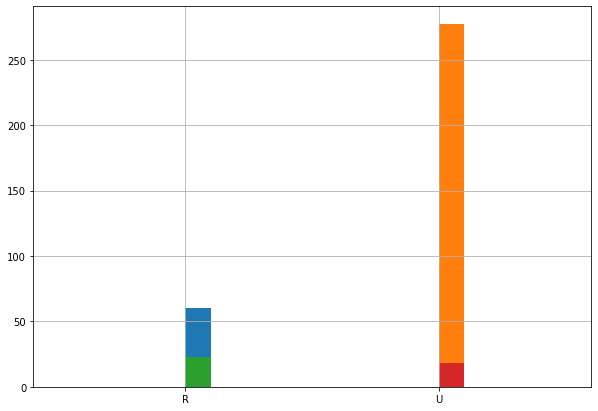

In [76]:
stud.groupby(['school', 'address']).address.hist(figsize=(10,7))

In [77]:
stud[['school', 'sex', 'age', 'address']].loc[stud.address.isnull()]

,school,sex,age,address
6,GP,M,16,NaN
52,GP,M,15,NaN
75,GP,M,15,NaN
92,GP,F,16,NaN
96,GP,M,16,NaN
159,GP,M,16,NaN
168,GP,F,16,NaN
241,GP,M,17,NaN
254,GP,M,17,NaN
270,GP,F,19,NaN


##### Предположение: 
поскольку пропусков всего 17, т.е. <5%, заполним их значением, которое представлено максимальным значением в распределении - это "U"

In [78]:
stud.address = stud.address.apply(lambda x: 'U' if pd.isnull(x) else x)

##### Выводы по колонке address:
- Заполнили пропуски значением "U", т.к. это значение встречается чаще всего

#### 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

27


GT3    261
LE3    107
Name: famsize, dtype: int64

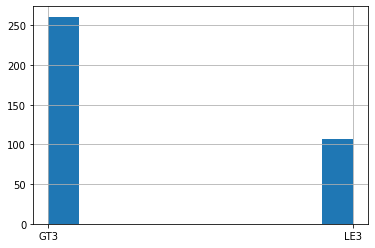

In [79]:
stud.famsize.hist();
print(stud.famsize.isnull().sum())
stud.famsize.value_counts()

In [80]:
# Соотношение GT3/LE3 ~ 2
stud.famsize.value_counts()[0] / stud.famsize.value_counts()[1]

2.439252336448598

school  famsize
GP      GT3        233
        LE3         91
MS      GT3         28
        LE3         16
Name: famsize, dtype: int64

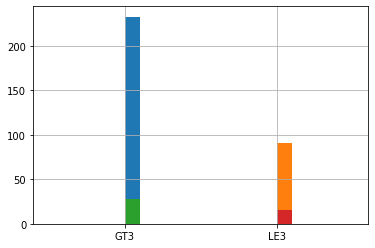

In [81]:
stud.groupby(['school', 'famsize']).famsize.hist()
stud.groupby(['school', 'famsize']).famsize.count()

sex  famsize
F    GT3        148
     LE3         49
M    GT3        113
     LE3         58
Name: famsize, dtype: int64

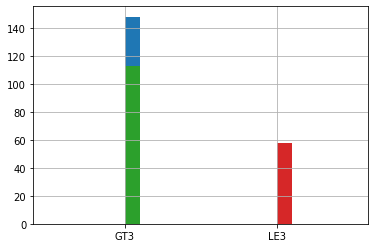

In [82]:
stud.groupby(['sex', 'famsize']).famsize.hist()
stud.groupby(['sex', 'famsize']).famsize.count()

age  famsize
15   GT3        57
     LE3        20
16   GT3        70
     LE3        28
17   GT3        64
     LE3        26
18   GT3        48
     LE3        27
19   GT3        18
     LE3         5
20   GT3         2
     LE3         1
21   GT3         1
22   GT3         1
Name: famsize, dtype: int64

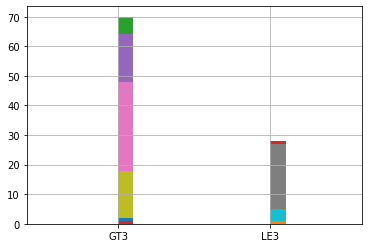

In [83]:
stud.groupby(['age', 'famsize']).famsize.hist()
stud.groupby(['age', 'famsize']).famsize.count()

address  famsize
R        GT3         58
         LE3         18
U        GT3        203
         LE3         89
Name: famsize, dtype: int64

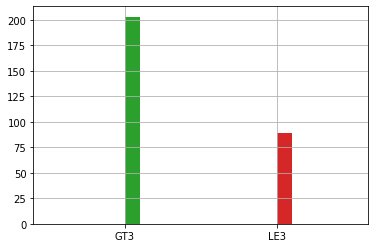

In [84]:
stud.groupby(['address', 'famsize']).famsize.hist()
stud.groupby(['address', 'famsize']).famsize.count()

Общее соотношение GT3/LE3 примерно равно 2.

Среди юношей и девушек соотношение GT3/LE3 также примерно равно 2. Заполним пропуски, беря во внимание пол и это соотношение. То есть для каждого пола наугад заполним GT3 и LE3 таким образом, чтобы было GT3:LE3 как 2:1.

In [85]:
# Найдем индексы для девушек: f_idx_GT3 - индексы, куда будем писать 'GT3', f_idx_LE3 - 'LE3'
print('Female:')
f_idx = stud[['sex','famsize']].loc[(stud.sex == 'F') & (stud.famsize.isnull())].index
print(f_idx)
f_idx_GT3 = f_idx[0:round(2/3*len(f_idx))]
print(f_idx_GT3)
f_idx_LE3 = pd.Index(set(f_idx) - set(f_idx_GT3))
print(f_idx_LE3)

# Аналогичные индексы для юношей
print('Male:')
m_idx = stud[['sex','famsize']].loc[(stud.sex == 'M') & (stud.famsize.isnull())].index
print(m_idx)
m_idx_GT3 = m_idx[0:round(2/3*len(m_idx))]
print(m_idx_GT3)
m_idx_LE3 = pd.Index(set(m_idx) - set(m_idx_GT3))
print('m_idx_LE3 =', m_idx_LE3)

# Объединяем одинаковые индексы
idx_GT3 = pd.Index(set(f_idx_GT3).union(set(m_idx_GT3)))
idx_LE3 = pd.Index(set(f_idx_LE3).union(set(m_idx_LE3)))

Female:
Int64Index([0, 79, 167, 195, 202, 221, 237, 313, 344, 360, 367], dtype='int64')
Int64Index([0, 79, 167, 195, 202, 221, 237], dtype='int64')
Int64Index([360, 313, 344, 367], dtype='int64')
Male:
Int64Index([9, 32, 36, 76, 78, 114, 128, 129, 172, 228, 235, 252, 253, 254,
            268, 280],
           dtype='int64')
Int64Index([9, 32, 36, 76, 78, 114, 128, 129, 172, 228, 235], dtype='int64')
m_idx_LE3 = Int64Index([268, 280, 252, 253, 254], dtype='int64')


In [86]:
# Заполняем 'GT3'
stud.loc[idx_GT3, 'famsize'] = 'GT3'
stud.iloc[idx_GT3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
128,GP,M,18,R,GT3,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
129,GP,M,16,R,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
195,GP,F,17,U,GT3,T,2.0,NaN,services,services,course,father,1.0,2.0,0.0,no,NaN,no,yes,yes,-6.0,yes,yes,yes,NaN,3.0,2.0,5.0,0.0,75.0
9,GP,M,15,U,GT3,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
202,GP,F,17,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,GP,F,16,U,GT3,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
221,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,-9.0,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0


In [87]:
# Заполняем 'LE3'
stud.loc[idx_LE3, 'famsize'] = 'LE3'
stud.iloc[idx_LE3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
280,GP,M,17,U,LE3,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
360,MS,F,18,R,LE3,A,1.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,yes,NaN,3.0,4.0,5.0,0.0,65.0
268,GP,M,18,U,LE3,NaN,4.0,2.0,NaN,other,reputation,father,NaN,2.0,0.0,no,NaN,yes,yes,yes,-6.0,yes,yes,yes,5.0,4.0,5.0,5.0,10.0,50.0
367,MS,F,17,R,LE3,T,1.0,1.0,other,services,reputation,mother,3.0,1.0,1.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,5.0,2.0,1.0,1.0,0.0,0.0
344,GP,F,18,U,LE3,T,2.0,3.0,at_home,other,course,NaN,1.0,3.0,NaN,no,yes,no,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,4.0,50.0
313,GP,F,19,U,LE3,NaN,3.0,2.0,services,other,reputation,other,2.0,2.0,NaN,no,NaN,NaN,no,no,-6.0,yes,yes,yes,4.0,2.0,2.0,1.0,22.0,55.0
252,GP,M,18,U,LE3,NaN,2.0,1.0,services,services,other,mother,1.0,1.0,1.0,no,no,no,no,no,-3.0,no,yes,no,3.0,2.0,5.0,5.0,4.0,40.0
253,GP,M,16,R,LE3,T,2.0,1.0,other,other,course,mother,2.0,1.0,0.0,no,no,NaN,yes,no,-3.0,yes,no,no,3.0,3.0,2.0,3.0,0.0,40.0
254,GP,M,17,U,LE3,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0


In [88]:
stud.famsize.isnull().sum()

0

##### Выводы по колонке famsize:
- Заполнили пропуски по алгоритму, описанному выше

#### 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

T    314
A     36
Name: Pstatus, dtype: int64


45

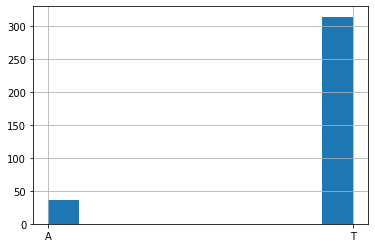

In [89]:
stud.Pstatus.hist();
print(stud.Pstatus.value_counts())
stud.Pstatus.isnull().sum()

Посмотрим, как признак связан с возрастом. Предположим, что старше какого-то возраста все живут отдельно.

In [90]:
stud.groupby(['Pstatus', 'age']).age.count()

Pstatus  age
A        15     10
         16      8
         17      9
         18      5
         19      2
         20      2
T        15     63
         16     82
         17     81
         18     67
         19     18
         20      1
         21      1
         22      1
Name: age, dtype: int64

Предположение не подтвердилось: все возрасты живут как вместе с родителями, так и раздельно. А самые возрастные - 21 и 22 года - так те только с родителями.

Поэтому пропуски заполним значением 'T', как максимально представленным в выборке.

In [91]:
# Получим индексы с пропусками в признаке Pstatus
Pstatus_null_idx = stud.loc[stud.Pstatus.isnull()].index
# Заполним пропуски
stud.loc[Pstatus_null_idx, 'Pstatus'] = 'T'
# Проверка
stud.Pstatus.isnull().sum()

0

##### Выводы по колонке Pstatus:
- Все возрасты живут как вместе с родителями, так и раздельно со значительным преобладанием "с родителями".
- Все пропуски заполнены значением 'T', как максимально представленным в выборке.

#### 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


3

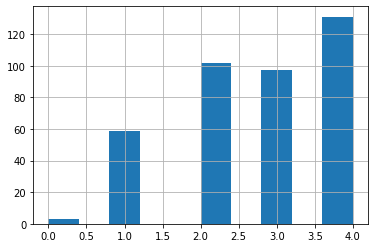

In [92]:
stud.Medu.hist();
print(stud.Medu.value_counts())
stud.Medu.isnull().sum()

Как ни странно, мамы с высшим образованием в абсолютном большинстве. Прпоусков всего 3.

А как этот признак=NaN соотносится с первыми тремя максимально заполненными колонками?

In [93]:
stud[['school', 'sex', 'age', 'Medu']].loc[stud.Medu.isnull()]

,school,sex,age,Medu
92,GP,F,16,NaN
193,GP,M,16,NaN
239,GP,M,18,NaN


Ввиду того, что пропусков мало, посмотрим как выглядят колонки с заполненным Medu и фиксированных ['school', 'sex', 'age']

2.0    19
4.0    16
3.0    13
1.0     5
Name: Medu, dtype: int64

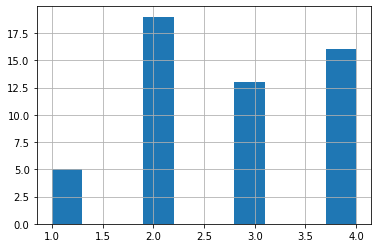

In [94]:
# GP	F	16 --> MeduMax = 2
stud.loc[(stud.school == 'GP') & (stud.sex == 'F') & (stud.age == 16)].Medu.hist();
stud.loc[(stud.school == 'GP') & (stud.sex == 'F') & (stud.age == 16)].Medu.value_counts()

4.0    19
3.0    13
2.0    11
1.0     5
0.0     1
Name: Medu, dtype: int64

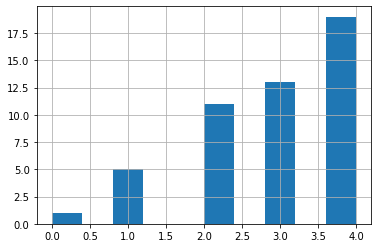

In [95]:
# GP	M	16 --> MeduMax = 4
stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 16)].Medu.hist();
stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 16)].Medu.value_counts()

4.0    11
2.0     8
3.0     7
1.0     1
Name: Medu, dtype: int64

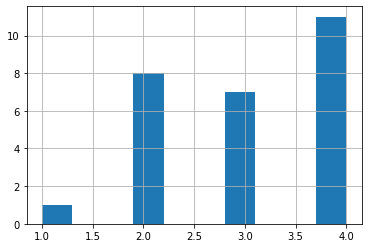

In [96]:
# GP	M	18 --> MeduMax = 4
stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 18)].Medu.hist();
stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 18)].Medu.value_counts()

Заполним пропуски, исходя из максимальных значений признака Medu при фиксированных значениях признаков school, sex, age (см. анализ выше)

In [97]:
# GP	F	16 --> MeduMax = 2
idx = stud.loc[(stud.school == 'GP') & (stud.sex == 'F') & (stud.age == 16) & 
               (stud.Medu.isnull())].Medu.index
stud.loc[idx, 'Medu'] = 2

# GP	M	16 --> MeduMax = 4
idx = stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 16) & 
               (stud.Medu.isnull())].Medu.index
stud.loc[idx, 'Medu'] = 4


# GP	M	18 --> MeduMax = 4
idx = stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 18) & 
               (stud.Medu.isnull())].Medu.index
stud.loc[idx, 'Medu'] = 4

stud.Medu.isnull().sum()

0

##### Выводы по колонке Medu
- Пропусков всего 3.
- Заполнили пропуски, исходя из максимальных значений признака Medu при фиксированных значениях признаков school, sex, age.

#### Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


24

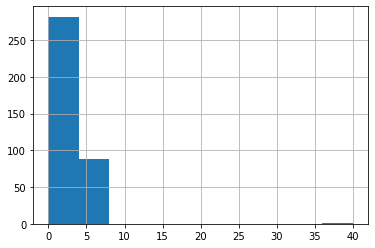

In [98]:
stud.Fedu.hist();
print(stud.Fedu.value_counts())
stud.Fedu.isnull().sum()

О, с образованием пап дела обстоят иначе.

Пропусков 24. 

И здесь имеется выброс. Судя по значению выброса, скорее всего это описка при записи значения = 4. Сначала исправим этот выброс с 40 на 4.

In [99]:
idx = stud.Fedu.loc[stud.Fedu == 40]
stud.loc[idx, 'Fedu'] = 4

2.0     105
3.0      96
4.0      89
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


24

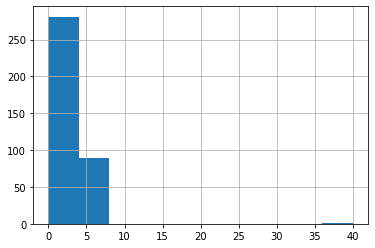

In [100]:
# Снова построим распределение, уже без выброса
stud.Fedu.hist();
print(stud.Fedu.value_counts())
stud.Fedu.isnull().sum()

Преобладает значение 2. Ввиду некоторой колоколообразности, заменим все пропуски на 2 - в каком-то смысле на среднее значение.

In [101]:
Fedu_null_idx = stud.loc[stud.Fedu.isnull()].index
stud.loc[Fedu_null_idx, 'Fedu'] = 2
# Проверка после замены
stud.Fedu.isnull().sum()

0

##### Выводы по колонке Fedu
- Был выброс, который заменили на подходящее значение, исходя из общих соображений. Скорее всего справа случайно был приписан 0.
- В остальном все пропуски заменили на среднее значение = 2, исходя из вида распределения

#### 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


19

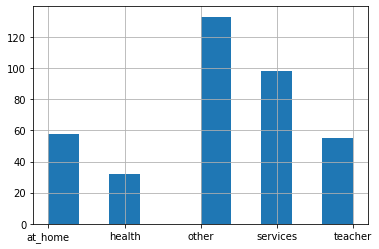

In [102]:
stud.Mjob.hist();
print(stud.Mjob.value_counts())
stud.Mjob.isnull().sum()

In [103]:
# Исходя из вида распределения, все пропуски заменим на среднее значение = 'other'
Mjob_null_idx = stud.loc[stud.Mjob.isnull()].index
stud.loc[Mjob_null_idx, 'Mjob'] = 'other'
# Проверка после замены
stud.Mjob.isnull().sum()

0

##### Выводы по колонке Mjob
- Распределение - колоколообразное. Исходя из вида распределения, все пропуски заменили на среднее значение = 'other'

#### 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


36

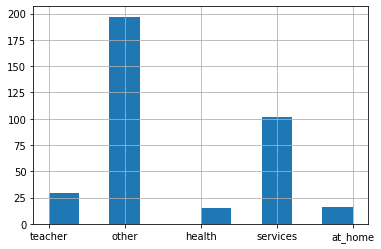

In [104]:
stud.Fjob.hist();
print(stud.Fjob.value_counts())
stud.Fjob.isnull().sum()

Распределение не колоколообразное, но значение 'other' явно выделяется. На него и заменим все пропуски

In [105]:
Fjob_null_idx = stud.loc[stud.Fjob.isnull()].index
stud.loc[Fjob_null_idx, 'Fjob'] = 'other'
# Проверка после замены
stud.Fjob.isnull().sum()

0

##### Выводы по колонке Fjob
- Исходя из вида распределения, все пропуски заменены на среднее значение = 'other'

#### 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64


17

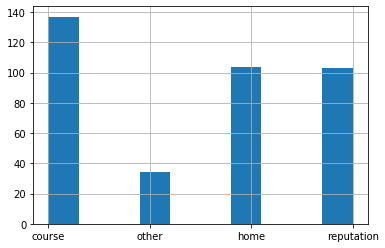

In [106]:
stud.reason.hist();
print(stud.reason.value_counts())
stud.reason.isnull().sum()

In [107]:
stud.groupby(['school', 'reason']).reason.count()

school  reason    
GP      course        119
        home           94
        other          25
        reputation     98
MS      course         18
        home           10
        other           9
        reputation      5
Name: reason, dtype: int64

In [108]:
stud.groupby(['sex', 'reason']).reason.count()

sex  reason    
F    course        68
     home          50
     other         18
     reputation    64
M    course        69
     home          54
     other         16
     reputation    39
Name: reason, dtype: int64

In [109]:
stud.groupby(['age', 'reason']).reason.count()

age  reason    
15   course        29
     home          21
     other          8
     reputation    22
16   course        32
     home          29
     other          9
     reputation    27
17   course        39
     home          20
     other          4
     reputation    28
18   course        30
     home          24
     other         10
     reputation    18
19   course         3
     home          10
     other          2
     reputation     8
20   course         3
21   course         1
22   other          1
Name: reason, dtype: int64

Судя по виду распределений, значение "course" преобладает во всех рассмотренных случаях (сравнение с первыми тремя колонками).

Несмотря на небольшой отрыв, возьмем именно это значение для заполнения пропусков.

In [110]:
reason_null_idx = stud.loc[stud.reason.isnull()].index
stud.loc[reason_null_idx, 'reason'] = 'course'
# Проверка после замены
stud.reason.isnull().sum()

0

##### Выводы по колонке reason
- Исходя из вида распределения, все пропуски заменены на значение = 'course', как максимально представленное

#### 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

mother    250
father     86
other      28
Name: guardian, dtype: int64


31

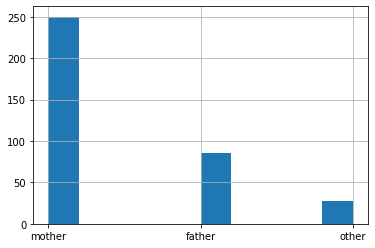

In [111]:
stud.guardian.hist();
print(stud.guardian.value_counts())
stud.guardian.isnull().sum()

In [112]:
guardian_null_idx = stud.loc[stud.guardian.isnull()].index
stud.loc[guardian_null_idx, 'guardian'] = 'mother'
# Проверка после замены
stud.guardian.isnull().sum()

0

##### Выводы по колонке guardian
- Исходя из вида распределения, все пропуски заменены на значение = 'mother', как максимально представленное

#### 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64


28

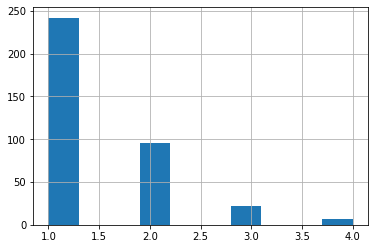

In [113]:
stud.traveltime.hist();
print(stud.traveltime.value_counts())
stud.traveltime.isnull().sum()

In [114]:
stud.groupby(['school', 'traveltime']).traveltime.count()

school  traveltime
GP      1.0           229
        2.0            76
        3.0            14
        4.0             6
MS      1.0            13
        2.0            20
        3.0             8
        4.0             1
Name: traveltime, dtype: int64

In [115]:
stud.groupby(['address', 'traveltime']).traveltime.count()

address  traveltime
R        1.0            34
         2.0            26
         3.0            12
         4.0             4
U        1.0           208
         2.0            70
         3.0            10
         4.0             3
Name: traveltime, dtype: int64

In [116]:
stud.groupby(['school', 'address', 'traveltime']).traveltime.count()

school  address  traveltime
GP      R        1.0            29
                 2.0            18
                 3.0             5
                 4.0             3
        U        1.0           200
                 2.0            58
                 3.0             9
                 4.0             3
MS      R        1.0             5
                 2.0             8
                 3.0             7
                 4.0             1
        U        1.0             8
                 2.0            12
                 3.0             1
Name: traveltime, dtype: int64

In [117]:
traveltime_null_GP_idx = stud.loc[(stud.traveltime.isnull()) & (stud.school == 'GP')].index
stud.loc[traveltime_null_GP_idx, 'traveltime'] = 1.0

traveltime_null_MS_idx = stud.loc[(stud.traveltime.isnull()) & (stud.school == 'MS')].index
stud.loc[traveltime_null_MS_idx, 'traveltime'] = 2.0

# Проверка после замены
stud.traveltime.isnull().sum()

0

##### Выводы по колонке traveltime
- Исходя из распределений:
    - Если школа = 'GP', пропуск заполняем значением = 1.0
    - Если школа = 'MS', пропуск заполняем значением = 2.0

#### 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


7

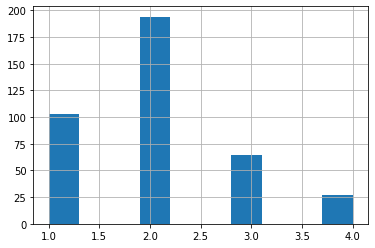

In [123]:
stud.studytime.hist();
print(stud.studytime.value_counts())
stud.studytime.isnull().sum()

In [125]:
studytime_null_idx = stud.loc[(stud.studytime.isnull())].index
stud.loc[studytime_null_idx, 'studytime'] = 2.0

# Проверка после замены
stud.studytime.isnull().sum()

0

##### Выводы по колонке studytime
- Все малочисленные пропуски заменяем на "среднее" значение = 2

#### 15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64


22

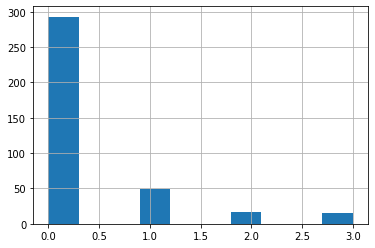

In [133]:
stud.failures.hist();
print(stud.failures.value_counts())
stud.failures.isnull().sum()

In [134]:
failures_null_idx = stud.loc[(stud.failures.isnull())].index
stud.loc[failures_null_idx, 'failures'] = 0.0

# Проверка после замены
stud.failures.isnull().sum()

0

##### Выводы по колонке failures
- С хорошим отрывом лидирует значение 0. Правда исходя из формулировки признака это может означать как собственно 0 неудач, так и более 3-х неудач. Все пропуски заполнены значением 0.

#### schoolsup — дополнительная образовательная поддержка (yes или no)

no     335
yes     51
Name: schoolsup, dtype: int64


9

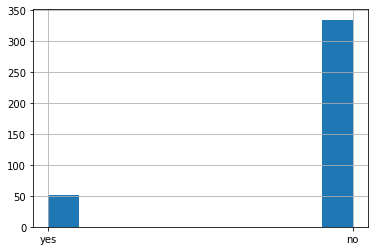

In [135]:
stud.schoolsup.hist();
print(stud.schoolsup.value_counts())
stud.schoolsup.isnull().sum()

In [136]:
schoolsup_null_idx = stud.loc[(stud.schoolsup.isnull())].index
stud.loc[schoolsup_null_idx, 'schoolsup'] = 'no'

# Проверка после замены
stud.schoolsup.isnull().sum()

0

##### Выводы по колонке schoolsup
- Исходя из вида распределения, все пропуски заменены на значение = 'no', как максимально представленное

#### famsup — семейная образовательная поддержка (yes или no)

yes    219
no     137
Name: famsup, dtype: int64


39

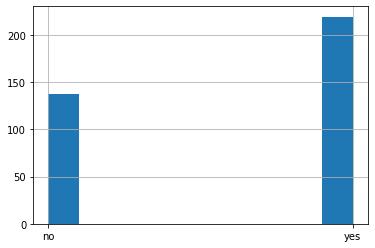

In [137]:
stud.famsup.hist();
print(stud.famsup.value_counts())
stud.famsup.isnull().sum()

Разница в кол-ве не очень существенная, поэтому посмотрим связь с колонкой school

In [138]:
stud.groupby(['school', 'famsup']).famsup.count()

school  famsup
GP      no        109
        yes       202
MS      no         28
        yes        17
Name: famsup, dtype: int64

In [139]:
famsup_null_GP_idx = stud.loc[(stud.famsup.isnull()) & (stud.school == 'GP')].index
stud.loc[famsup_null_GP_idx, 'famsup'] = 'yes'

famsup_null_MS_idx = stud.loc[(stud.famsup.isnull()) & (stud.school == 'MS')].index
stud.loc[famsup_null_MS_idx, 'famsup'] = 'no'

# Проверка после замены
stud.famsup.isnull().sum()

0

##### Выводы по колонке famsup
- Исходя из распределения:
    - Если школа = 'GP', пропуск заполняем значением = 'yes'
    - Если школа = 'MS', пропуск заполняем значением = 'no'

#### 18 paid — дополнительные платные занятия по математике (yes или no)

no     200
yes    155
Name: paid, dtype: int64


40

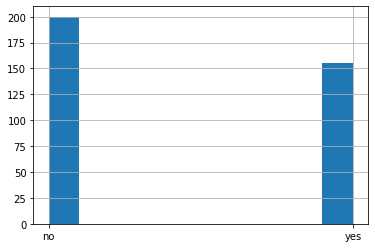

In [140]:
stud.paid.hist();
print(stud.paid.value_counts())
stud.paid.isnull().sum()

Разница в кол-ве не очень существенная, поэтому посмотрим связь с колонкой school

In [141]:
stud.groupby(['school', 'paid']).paid.count()

school  paid
GP      no      174
        yes     138
MS      no       26
        yes      17
Name: paid, dtype: int64

От типа школы не зависит. А от пола?

In [142]:
stud.groupby(['sex', 'paid']).paid.count()

sex  paid
F    no       97
     yes      92
M    no      103
     yes      63
Name: paid, dtype: int64

Тоже не зависит. Осталось проверить связь с возрастом.

In [143]:
stud.groupby(['age', 'paid']).paid.count()

age  paid
15   no      41
     yes     31
16   no      52
     yes     43
17   no      48
     yes     37
18   no      40
     yes     36
19   no      16
     yes      6
20   no       1
     yes      2
21   no       1
22   no       1
Name: paid, dtype: int64

За исключением одного случая, где превышение "yes" над "no" мала, во всех остальных случаях значение "no" выделяется. На него и заменим пропуски.

In [144]:
paid_null_idx = stud.loc[(stud.paid.isnull())].index
stud.loc[paid_null_idx, 'paid'] = 'no'

# Проверка после замены
stud.paid.isnull().sum()

0

##### Выводы по колонке paid
- Исходя из вида распределений, все пропуски заменены на значение = 'no', как максимально представленное

#### 19 activities — дополнительные внеучебные занятия (yes или no)

yes    195
no     186
Name: activities, dtype: int64


14

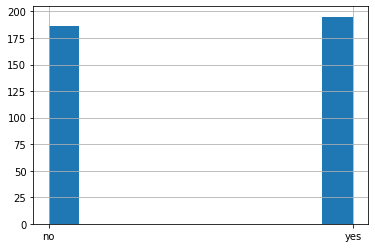

In [145]:
stud.activities.hist();
print(stud.activities.value_counts())
stud.activities.isnull().sum()

Начинаем сравнение с первыми тремя колонками

In [146]:
stud.groupby(['school', 'activities']).activities.count()

school  activities
GP      no            157
        yes           179
MS      no             29
        yes            16
Name: activities, dtype: int64

In [147]:
stud.groupby(['sex', 'activities']).activities.count()

sex  activities
F    no            109
     yes            93
M    no             77
     yes           102
Name: activities, dtype: int64

In [148]:
stud.groupby(['age', 'activities']).activities.count()

age  activities
15   no            35
     yes           41
16   no            40
     yes           59
17   no            50
     yes           46
18   no            43
     yes           38
19   no            14
     yes           10
20   no             2
     yes            1
21   no             1
22   no             1
Name: activities, dtype: int64

In [149]:
activities_null_le17_idx = stud.loc[(stud.activities.isnull()) & (stud.age < 17)].index
stud.loc[activities_null_le17_idx, 'activities'] = 'yes'

activities_null_gteq17_idx = stud.loc[(stud.activities.isnull()) & (stud.age >= 17)].index
stud.loc[activities_null_gteq17_idx, 'activities'] = 'no'

# Проверка после замены
stud.activities.isnull().sum()

0

##### Выводы по колонке activities
- При заполнении пропусков ориентируемся на зависимость от возраста:
    - (кол-во пропусков) < 17 - заполняем "yes"
    - (кол-во пропусков) >= 17 - "no"

#### 20 nursery — посещал детский сад (yes или no)

yes    300
no      79
Name: nursery, dtype: int64


16

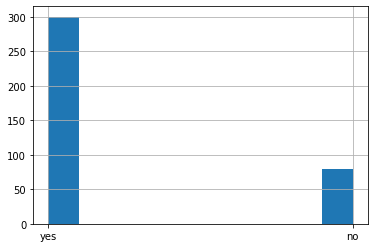

In [150]:
stud.nursery.hist();
print(stud.nursery.value_counts())
stud.nursery.isnull().sum()

In [151]:
nursery_null_idx = stud.loc[(stud.nursery.isnull())].index
stud.loc[nursery_null_idx, 'nursery'] = 'yes'

# Проверка после замены
stud.nursery.isnull().sum()

0

##### Выводы по колонке nursery
- Пропуски заполнены максимально представленным значением - "yes"

#### 21 higher — хочет получить высшее образование (yes или no)

yes    316
no      79
Name: nursery, dtype: int64


0

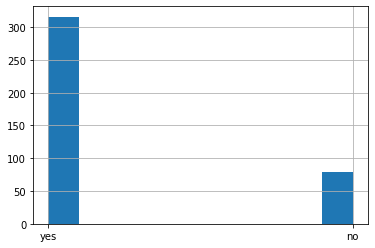

In [152]:
stud.nursery.hist();
print(stud.nursery.value_counts())
stud.nursery.isnull().sum()

In [153]:
higher_null_idx = stud.loc[(stud.higher.isnull())].index
stud.loc[higher_null_idx, 'higher'] = 'yes'

# Проверка после замены
stud.higher.isnull().sum()

0

##### Выводы по колонке higher
- Пропуски заполнены максимально представленным значением - "yes"

#### 22 internet — наличие интернета дома (yes или no)

yes    305
no      56
Name: internet, dtype: int64


34

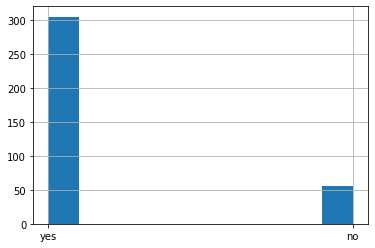

In [154]:
stud.internet.hist();
print(stud.internet.value_counts())
stud.internet.isnull().sum()

In [155]:
internet_null_idx = stud.loc[(stud.internet.isnull())].index
stud.loc[internet_null_idx, 'internet'] = 'yes'

# Проверка после замены
stud.internet.isnull().sum()

0

##### Выводы по колонке internet
- Пропуски заполнены максимально представленным значением - "yes"

#### 23 romantic — в романтических отношениях (yes или no)

no     240
yes    124
Name: romantic, dtype: int64


31

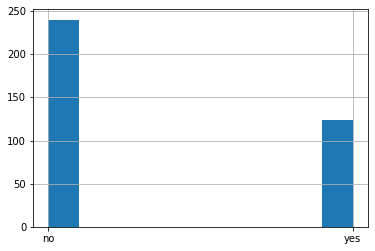

In [156]:
stud.romantic.hist();
print(stud.romantic.value_counts())
stud.romantic.isnull().sum()

In [157]:
stud.groupby(['school', 'romantic']).romantic.count()

school  romantic
GP      no          215
        yes         106
MS      no           25
        yes          18
Name: romantic, dtype: int64

In [158]:
stud.groupby(['sex', 'romantic']).romantic.count()

sex  romantic
F    no          117
     yes          78
M    no          123
     yes          46
Name: romantic, dtype: int64

In [159]:
stud.groupby(['age', 'romantic']).romantic.count()

age  romantic
15   no          53
     yes         18
16   no          70
     yes         27
17   no          58
     yes         34
18   no          43
     yes         33
19   no          13
     yes         10
20   no           2
     yes          1
21   no           1
22   yes          1
Name: romantic, dtype: int64

Зависимость одинаковая - значений "no" больше, чем "yes"

In [160]:
romantic_null_idx = stud.loc[(stud.romantic.isnull())].index
stud.loc[romantic_null_idx, 'romantic'] = 'no'

# Проверка после замены
stud.romantic.isnull().sum()

0

##### Выводы по колонке romantic
- Пропуски заполнены максимально представленным значением - "no"

#### 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64


27

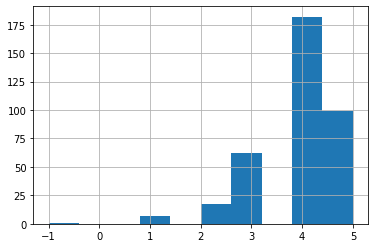

In [161]:
stud.famrel.hist();
print(stud.famrel.value_counts())
stud.famrel.isnull().sum()

Один выброс = -1. Предположим, что знак "минус" проставлен по ошибке. Исправим на +1

In [162]:
stud.loc[stud.famrel == -1, 'famrel'] = 1

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64


27

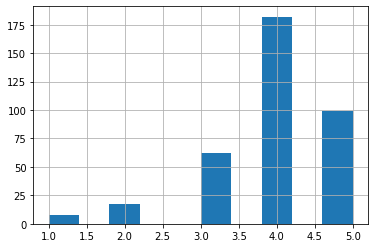

In [163]:
stud.famrel.hist();
print(stud.famrel.value_counts())
stud.famrel.isnull().sum()

In [164]:
famrel_null_idx = stud.loc[(stud.famrel.isnull())].index
stud.loc[famrel_null_idx, 'famrel'] = 4

# Проверка после замены
stud.famrel.isnull().sum()

0

##### Выводы по колонке famrel
- У значения, соответствующего выбросу = -1 исправлен знак на "+"
- Пропуски заменены на макс. представленное значение = 4

#### 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64


11

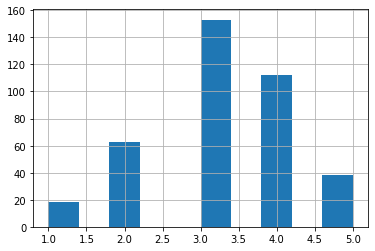

In [165]:
stud.freetime.hist();
print(stud.freetime.value_counts())
stud.freetime.isnull().sum()

Этот признак по идее должен обратно коррелировать с признаком studytime. Проверим

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64


0

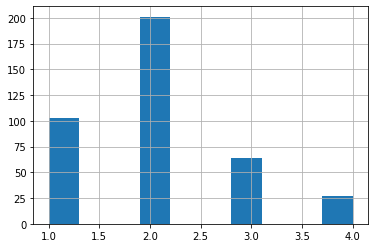

In [166]:
stud.studytime.hist();
print(stud.studytime.value_counts())
stud.studytime.isnull().sum()

Обратная корреляция на первый взгляд есть, но было бы лучше, если бы кол-во диапазонов разбиения в обоих случаях было одинаковым

In [167]:
freetime_null_idx = stud.loc[(stud.freetime.isnull())].index
stud.loc[freetime_null_idx, 'freetime'] = 3

# Проверка после замены
stud.freetime.isnull().sum()

0

##### Выводы по колонке freetime
- Пропуски заменены на макс. представленное значение = 3

#### 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64


8

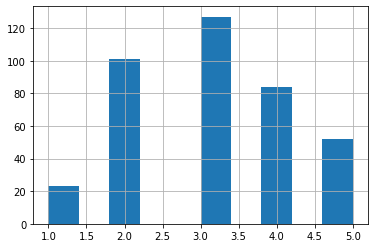

In [168]:
stud.goout.hist();
print(stud.goout.value_counts())
stud.goout.isnull().sum()

In [169]:
goout_null_idx = stud.loc[(stud.goout.isnull())].index
stud.loc[goout_null_idx, 'goout'] = 3

# Проверка после замены
stud.goout.isnull().sum()

0

##### Выводы по колонке goout
- Пропуски заменены на макс. представленное значение = 3

#### 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64


15

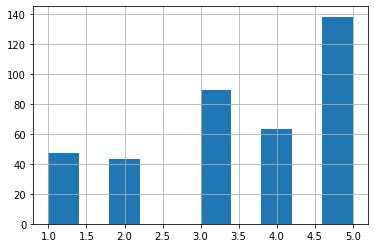

In [170]:
stud.health.hist();
print(stud.health.value_counts())
stud.health.isnull().sum()

In [171]:
health_null_idx = stud.loc[(stud.health.isnull())].index
stud.loc[health_null_idx, 'health'] = 3

# Проверка после замены
stud.health.isnull().sum()

0

##### Выводы по колонке health
- Пропуски заменены на среднее значение = 3

#### 28 absences — количество пропущенных занятий

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


12

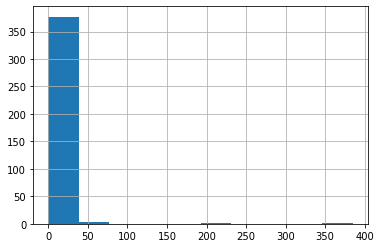

In [172]:
stud.absences.hist();
print(stud.absences.value_counts())
stud.absences.isnull().sum()

Все значения >= 180 (20 учебных дней в месяц * 9 месяцев) будем считать выбросами. Посмотрим на них отдельно

In [174]:
stud.loc[stud.absences >= 180]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_gran,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Заменим выбросы на макс. кол-во пропусков, которое меньше 180

In [175]:
stud.loc[stud.absences < 180].absences.max()

75.0

In [177]:
stud.loc[stud.absences >= 180, 'absences'] = 75.

0.0     111
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
12.0     12
14.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
75.0      3
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
25.0      1
17.0      1
54.0      1
26.0      1
56.0      1
23.0      1
28.0      1
21.0      1
30.0      1
19.0      1
38.0      1
40.0      1
24.0      1
Name: absences, dtype: int64


12

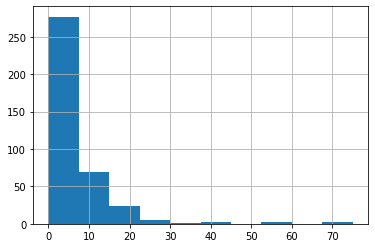

In [178]:
stud.absences.hist();
print(stud.absences.value_counts())
stud.absences.isnull().sum()

In [181]:
absences_null_idx = stud.loc[(stud.absences.isnull())].index
stud.loc[absences_null_idx, 'absences'] = round(stud.absences.mean())

# Проверка после замены
stud.absences.isnull().sum()

0

##### Выводы по колонке absences
- Заменили выбросы на макс. кол-во пропусков, которое меньше 180 (=75)
- Пропуски заменили на среднее кол-во пропусков = 6

#### 29 score — баллы по госэкзамену по математике

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64


6

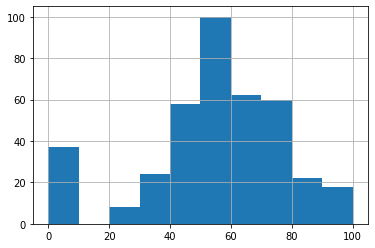

In [182]:
stud.score.hist();
print(stud.score.value_counts())
stud.score.isnull().sum()

In [183]:
score_null_idx = stud.loc[(stud.score.isnull())].index
stud.loc[score_null_idx, 'score'] = round(stud.score.mean())

# Проверка после замены
stud.score.isnull().sum()

0

##### Выводы по колонке score
- Выбросов нет
- Пропуски заменили на среднее кол-во пропусков = 6

#### 30 studytime, granular — назначение колонки пока неизвестно

In [119]:
# Переименуем колонку "studytime, granular" в колонку "studytime_gran"
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 
    'paid', 'activities', 'nursery', 'studytime_gran', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'health', 'absences', 'score']
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_gran', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_gran, dtype: int64


7

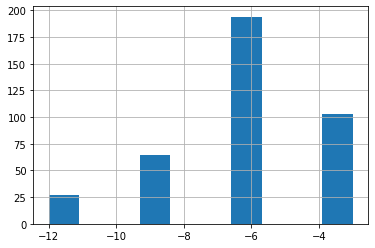

In [126]:
stud.studytime_gran.hist();
print(stud.studytime_gran.value_counts())
stud.studytime_gran.isnull().sum()

In [128]:
# Зависимость между колонками studytime и studytime_gran
stud.groupby(['studytime', 'studytime_gran']).studytime_gran.count()

studytime  studytime_gran
1.0        -3.0              103
2.0        -6.0              201
3.0        -9.0               64
4.0        -12.0              27
Name: studytime_gran, dtype: int64

Налицо линейная зависимость с коэффициентом = -3.

Кол-во пропусков ровно столько же, сколько было в колонке studytime. Заполним пропуски аналогично же, т.е. для заполнения возьмем свое "среднее" значение = -6.

In [127]:
studytime_gran_null_idx = stud.loc[(stud.studytime_gran.isnull())].index
stud.loc[studytime_gran_null_idx, 'studytime_gran'] = -6.0

# Проверка после замены
stud.studytime_gran.isnull().sum()

0

##### Выводы по колонке studytime_gran
- Все малочисленные пропуски заменяем на "среднее" значение = -6
- Предположение о смысловой нагрузке колонки studytime_gran:

Если посмотреть на соответствие с колонкой studytime в таком виде:

studytime: .... (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
    
studytime_gran: .......-3, .........-6, ...........-9, ...........-12

и принять во внимание, что рабочих/учебных дней в месяце = 20-22, т.е. среднее кол-во = 21, тогда делаем предположение, что в колонке studytime_gran указан недоотдых (например, недосып) ученика в течение рабочего месяца.

- Поскольку есть однозначное соответствие между двумя рассмотренными колонками, для дальнейшего исследования можно оставить одну из них - studytime.

In [120]:
# стоит написать функции, которые можно применять к столбцам определённого типа.

2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем при построении модели.

## Окончательные преобразования строковых колонок в числовые

In [121]:
# # school. Замена на числовые значения
# stud.school = stud.school.apply(lambda x: 0 if x == 'GP' else 1)

# # sex. Преобразуем значения колонки в числовые
# stud.sex = stud.sex.apply(lambda x: 0 if x == 'F' else 1)

# # address. И заменим строковые значения числовыми
# stud.address = stud.address.apply(lambda x: 0 if x=='U' else 1)

# - school. Заменили строковые значения на числовые: GP=0, MS=1
# - sex. Заменили строковые значения на числовые: F=0, M=1
# - address. Заменили строковые значения на числовые: U=0, R=1


# Обучение модели

Если будет время, можно позапускать модельки. Только без создания новых признаков.
Если подойдет, можно попробовать метрику ROC AUC

# Промежуточные выводы

# Основные итоги работы

# *Дополнительно:
оставьте комментарий по своей работе для ментора.

In [122]:
# 23.05.2020 - 3 ч.
# 24.05.2020 - 1 ч.
# 25.05.2020 - 1.5 ч.
# 26.05.2020 - 2.5 ч.
